<b> Actually, the first step is to know what we are expecting as output so our goal is to find out if a person has diabetes or not, the steps involved in it included are :</b>
<ol>
<li>Data Loading</li>
<li>Data Cleaning</li> 
<li>Data Transforamtion</li>
<li>Data Integration</li>
<li>Identifying features and targets</li>
<li>Visulaization</li>
<li>Splitting</li>
<li>Model Building</li>
<li>Model Evaluation</li>
<li>Model Deployment</li>
</ol>

Loading the data using the pandas function read_csv() 

The file is locally stored with the name diabetes_data.csv

In [3]:
import pandas as pd #importing the library
data = pd.read_csv("diabetes_data.csv") #reading the data
data.head() # getting the first five row to know the skeleton of the dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


using the .info() mwthod to get the information about the attributes of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

<b> From this summary we got an idea that there are no null values as the count of non-null in each the column is matching the nummber of rows</b>
<br>
The data set is more of objects and we have only one numerical column i.e, AGE

<b> we can skip the data cleaning and go to data Transforamtion</b>

In [5]:
#using the .head() method to get a knowledge on the dataset(for better understanding)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


 As we can we see the data in most of the categorical columns is of like binary type
<ul><li>Yes</li>
<li>No</li>
</ul>
<b><big>We need to using Encoding techinques in the scikit-learn to transform them into numerical as many ml models take numerical values (or) we can also use get_dummies(). But, we are now using Encoding Techniques</big>
</b>


as the data has only one numerical column we are dropping it and storing the other columns in a new variable called <b>"cat_col"</b>

In [6]:
cat_col = pd.DataFrame(data.drop("Age",axis=1))

In [7]:
#checking if the all the categorical columns are stored or not
cat_col.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
#reverfying if all the columns in cat_col are object or not
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              520 non-null    object
 1   Polyuria            520 non-null    object
 2   Polydipsia          520 non-null    object
 3   sudden weight loss  520 non-null    object
 4   weakness            520 non-null    object
 5   Polyphagia          520 non-null    object
 6   Genital thrush      520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    object
dtypes: object(16)
memory usage

from the above inference all of the columns in the cat_col are categroical (<i>object</i>)


<b> importing the required libraries from scikit-learn for enconding<br><ol><li>LabelEncoder</li><li>OneHotEncoder</li></ol><br><i>
We are now using labelEncoding</i></b>

In [9]:
from sklearn.preprocessing import LabelEncoder
# creating an object for the LabelEncoder
le = LabelEncoder()

<b><i> creating a for loop, so that it can be applied repeatedly to all the columns in the</i>cat_col</b>

In [10]:
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [11]:
#checking if the all the columns are changed into numeric or not.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
 16  class               520 non-null    int32
dt

<b> As we can see all the columns are now numerical type<b>

<i>

<i>The next step is to identify the features and targets<i>
<h5>From our observation we found that the<ul><li> <b>target:"class" </li><li>features : All the columns except the "class" column</li><ul>

In [12]:
# storing the features in a new variable named "x"
x = data.drop("class",axis=1)
#preview of the data in "x"
x.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [13]:
# storing the target in a new variable named "y"
y = data['class']
#preview of the data in "y"
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32

<b>Creating the visualizations for the features and targets for better insights</b><br>

<i>We are using the matplotlib for the graphs</i>

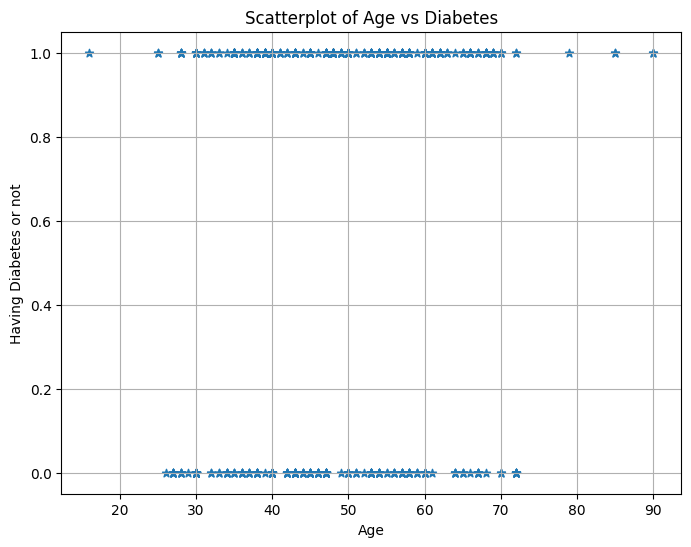

In [22]:
#importing the matplotlib library
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x['Age'],y,marker="*")
plt.xlabel("Age")
plt.ylabel("Having Diabetes or not")
plt.title("Scatterplot of Age vs Diabetes")
plt.grid()
plt.show()

here we are using the scatter plot to know the relation between the age and chances of diabetes

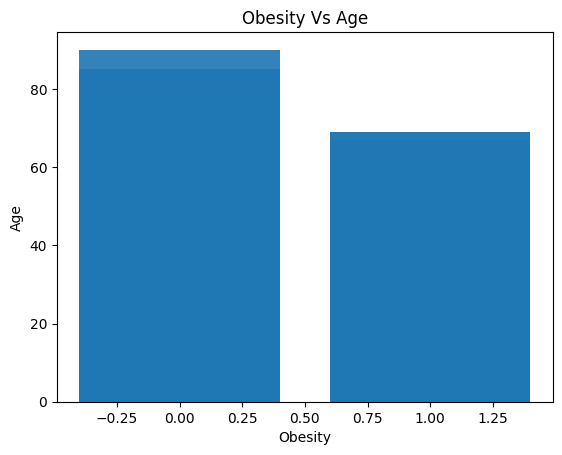

In [26]:

plt.bar(x['Obesity'],x['Age'], alpha=0.7)
plt.xlabel('Obesity')
plt.ylabel('Age')
plt.title('Obesity Vs Age')
plt.show()

spliting the data training and testing sets


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<b> Model building</b>


We are first using the LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred = lr.predict(x_test)


In [53]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test,y_pred)
acs

0.9230769230769231

In [48]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)


SVC()

In [49]:
model_pred = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test,y_pred)
acs

0.9230769230769231